# <center>Data exploration</center>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
import seaborn as sns
from sklearn.decomposition import PCA
%matplotlib inline
sns.set()

We will load data from data.npz file.

In [2]:
# Load all numpy arrays except training images (in order to save memory).
def load_data():
    with np.load('data.npz', allow_pickle=True) as npz_file:
        #X_train = npz_file['X_train']
        X_valid = npz_file['X_valid']
        X_test = npz_file['X_test']
        X_train_features = npz_file['X_train_features']
        X_valid_features = npz_file['X_valid_features']
        X_test_features = npz_file['X_test_features']
        y_train_1h = npz_file['y_train_1h']
        y_valid_1h = npz_file['y_valid_1h']
        y_test_1h = npz_file['y_test_1h']
        y_train = npz_file['y_train']
        y_valid = npz_file['y_valid']
        y_test = npz_file['y_test']
        class_indices = npz_file['class_indices']
        train_filenames = npz_file['train_filenames']
        valid_filenames = npz_file['valid_filenames']
        test_filenames = npz_file['test_filenames']
    return X_train_features, y_train_1h, y_train, train_filenames, X_valid,X_valid_features, y_valid_1h, y_valid, valid_filenames, X_test, X_test_features, y_test_1h, y_test, test_filenames,class_indices

# load training images
def load_images():
    with np.load('data.npz', allow_pickle=True) as npz_file:
        X_train = npz_file['X_train']
    return X_train


X_train_features, y_train_1h, y_train, train_filenames, X_valid,X_valid_features, y_valid_1h, y_valid, valid_filenames, X_test, X_test_features, y_test_1h, y_test, test_filenames,class_indices = load_data()

## Data exploration
Start by some quick data exploration. Perform the following tasks
- Plot a few images from each category

This function will plot images passed as arguments

In [3]:
def show_images(di, images, lines = 1, cols=1, figsize=(30,10),titles=None):
    n = len(images)
    fig = plt.figure(figsize=figsize)
    for i, image in enumerate(images):
        a = fig.add_subplot(lines, cols, i + 1)
        pil_im = Image.open(di+image,'r')
        plt.imshow(pil_im)
        if type(titles)==type(None):
            titles_=images
        else:
            titles_=titles
        a.set_title(f'{titles_[i]}')
        a.axis('off')
    fig.set_size_inches(figsize)
    plt.show()

We will plot some train images selected randomly :

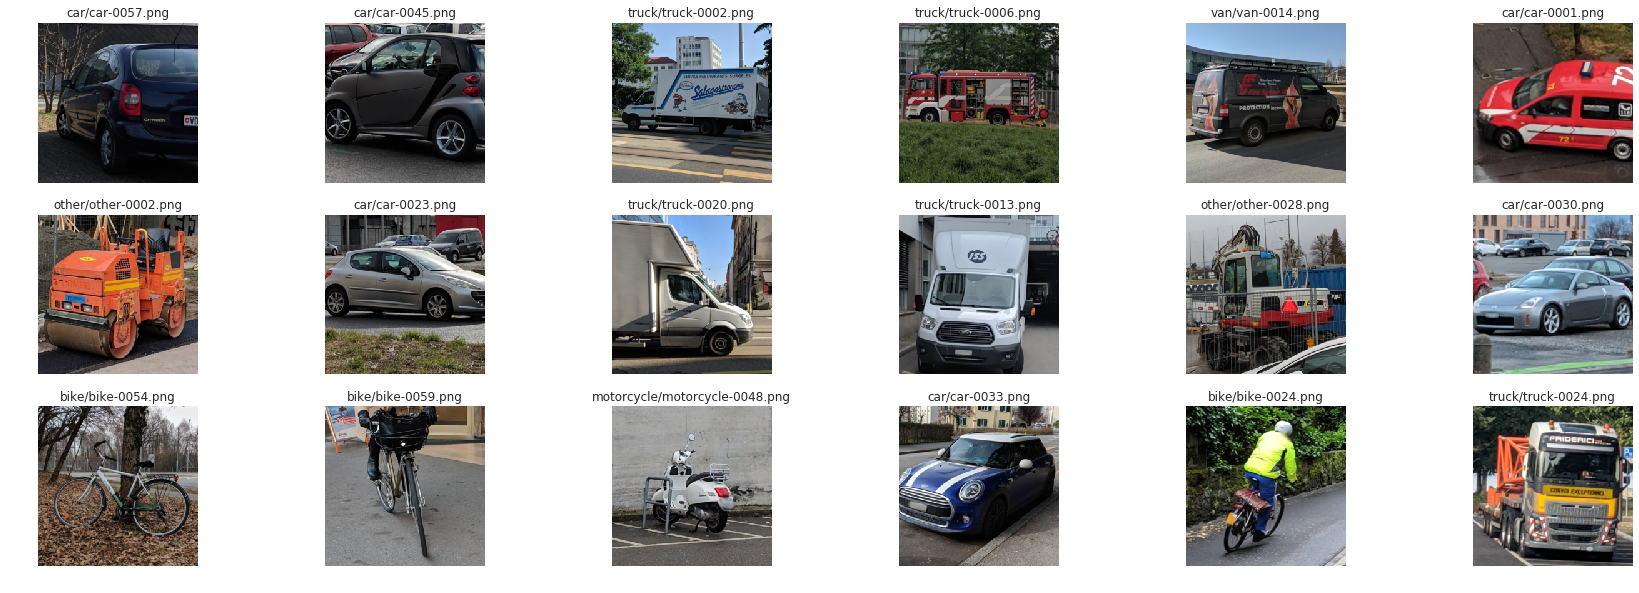

In [4]:
show_images('data/train/',train_filenames[np.random.choice(len(train_filenames), replace=False, size=3*6)],3,6)

We will plot some validation images selected randomly :

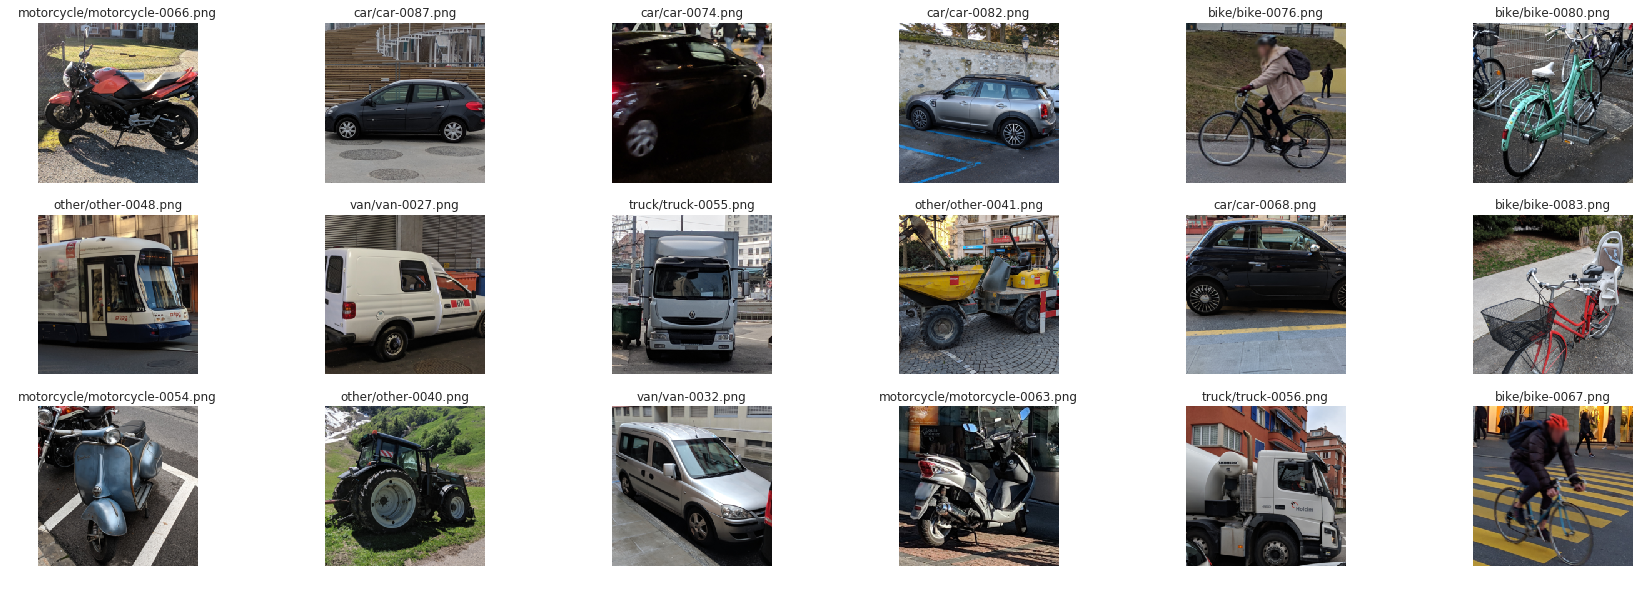

In [5]:
show_images('data/valid/',valid_filenames[np.random.choice(len(valid_filenames), replace=False, size=3*6)],3,6)

We will plot some test images selected randomly :

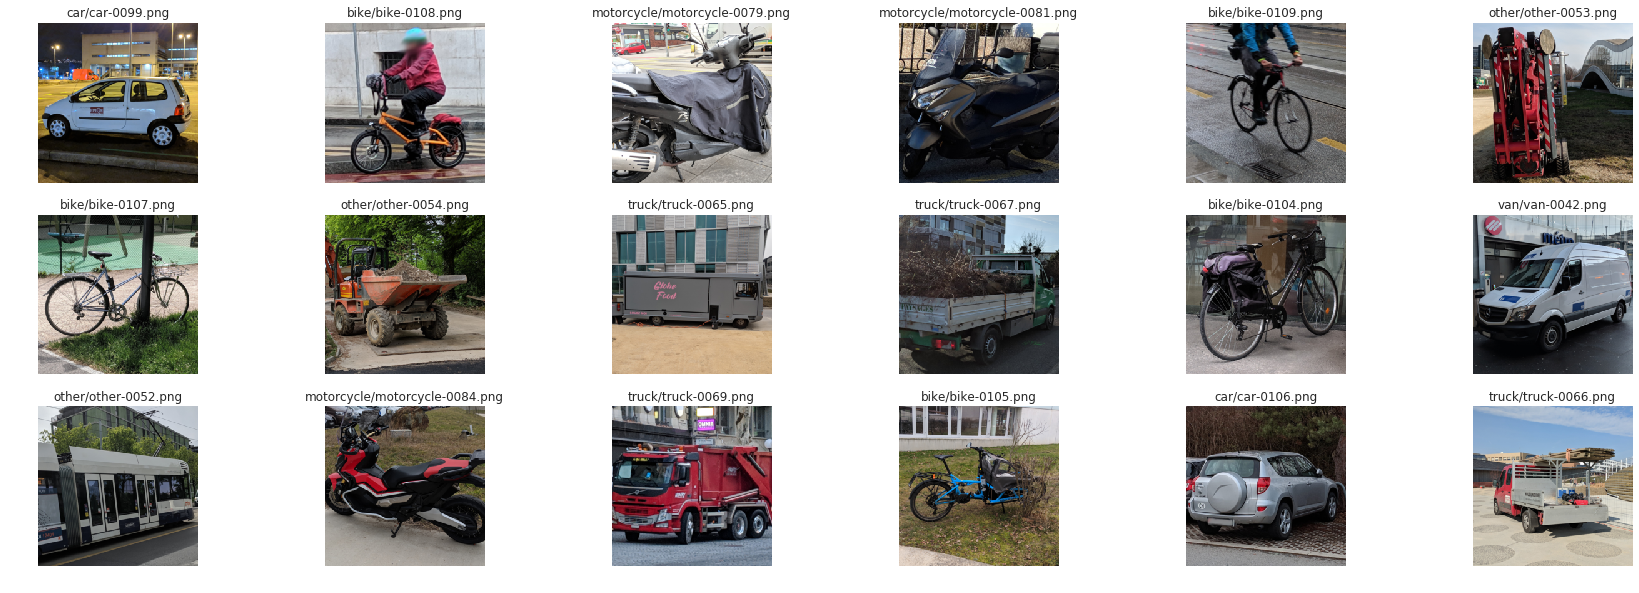

In [6]:
show_images('data/test/',test_filenames[np.random.choice(len(test_filenames), replace=False, size=3*6)],3,6)

- Make a scree plot, how many components explain 10%, 20%, …, 90% and 100% of the variance?

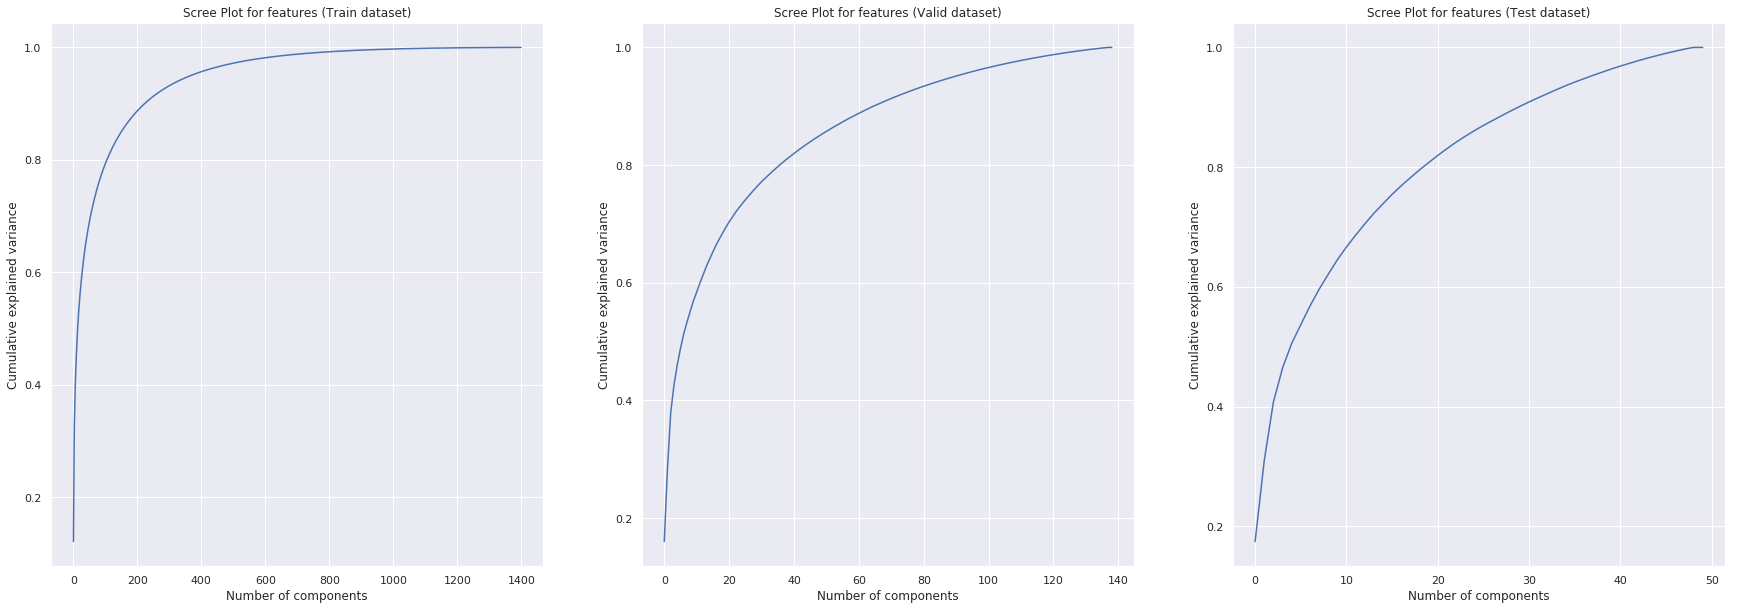

In [7]:
fig = plt.figure(figsize=(30,10))
cols  = 3 
lines = 1
data = [('Train dataset',X_train_features),
       ('Valid dataset',X_valid_features),
       ('Test dataset',X_test_features)
       ]
# scree plot of a dataset
def plot_scree(data):
    return_value = {}
    # for each data set
    for i,( ds, X) in enumerate(data):
        ax = fig.add_subplot(lines, cols, i + 1)
        pca = PCA()
        pca.fit(X)
        # cumulated sum of explained variance
        cs_evr = np.cumsum(pca.explained_variance_ratio_)
        pct = np.arange(1,11)
        # return value will be a dataframe containing number of components needed to explain 10% 20% ... 100%
        # np.argmax(cs_evr>=x) : gives the first element in vector cs_evr which is greater than x. x from 10% to 100%.
        return_value[ds] = pd.DataFrame({'name':ds,'dataset_size':X.shape[0],'percent':10*pct, 'Nbr of components':[1+np.argmax(cs_evr>=x) for x in pct/10]})
        ax.plot(cs_evr)
        ax.set_title(f'Scree Plot for features ({ds})')
        ax.set_xlabel('Number of components')
        ax.set_ylabel(f'Cumulative explained variance')
    return return_value

pct = plot_scree(data)

The number of features (2048) is much bigger than the number of rows in test and validation sets.
We will use only train data for this part.

For train set, the number of components that explain 10%, 20%, …, 90% and 100% of the variance are :


In [8]:
pct['Train dataset']

name  dataset_size  percent  Nbr of components
0  Train dataset          1400       10                  1
1  Train dataset          1400       20                  2
2  Train dataset          1400       30                  4
3  Train dataset          1400       40                  7
4  Train dataset          1400       50                 15
5  Train dataset          1400       60                 29
6  Train dataset          1400       70                 55
7  Train dataset          1400       80                106
8  Train dataset          1400       90                224
9  Train dataset          1400      100                  1

- Visualize the features on a 2d-plot with PCA using the first two components. What can you say about the results?

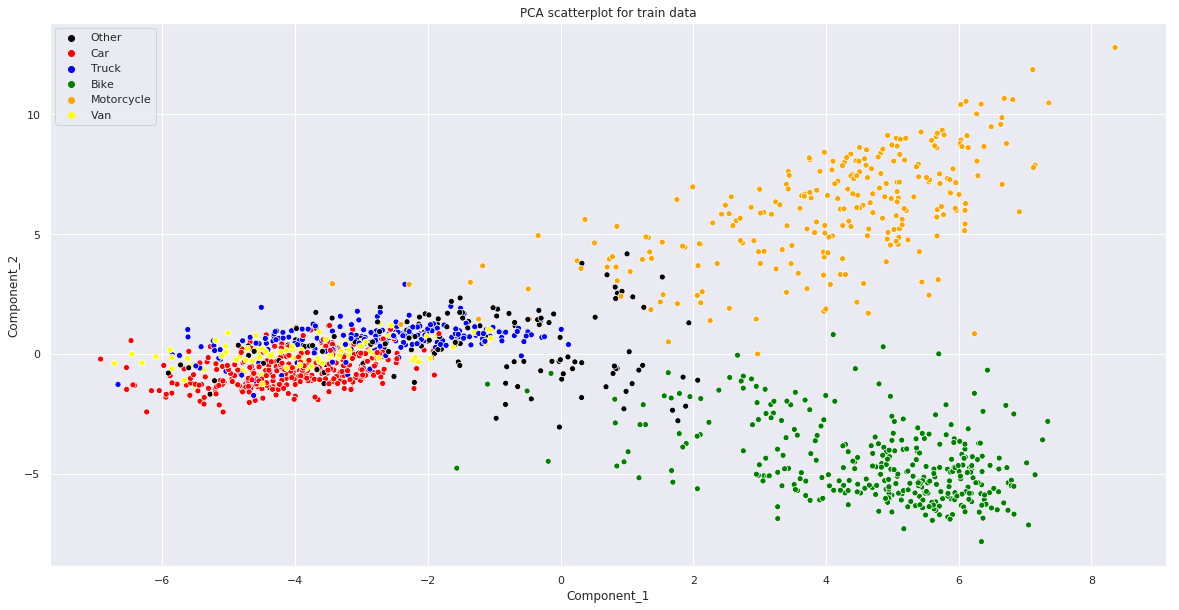

In [9]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_features)
names={0:'Bike', 1:'Car', 2:'Motorcycle', 3:'Other', 4:'Truck', 5:'Van'}
y_names = [names[i] for i in y_train]
plt.figure(figsize=(20,10))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y_names,palette=['black','red','blue','green', 'orange', 'yellow']);
plt.title('PCA scatterplot for train data')
plt.xlabel('Component_1')
plt.ylabel('Component_2');

The explained variance using the two first components is about 21% :

In [10]:
np.cumsum(pca.explained_variance_ratio_)[-1]*100

21.71909213066101

As we can see, in the chart, using only two components :
- Bikes are clearly separate from other groups. Same remark for Motocycles.
- Cars, Trucks, Vans and Other are close together.